<a href="https://colab.research.google.com/github/ahmadyadgari/house_price_predictor/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House-Price Predictor Notebook

In [2]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 2. Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Show all columns in DataFrame outputs
pd.set_option('display.max_columns', None)

In [5]:
# 3. Load Dataset
data_dir = '/content/drive/MyDrive/house-prices/'
train_df = pd.read_csv(f'{data_dir}train.csv')
test_df  = pd.read_csv(f'{data_dir}test.csv')

print(f"Training set: {train_df.shape}, Test set: {test_df.shape}")
train_df.head()

Training set: (17000, 9), Test set: (3000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,0


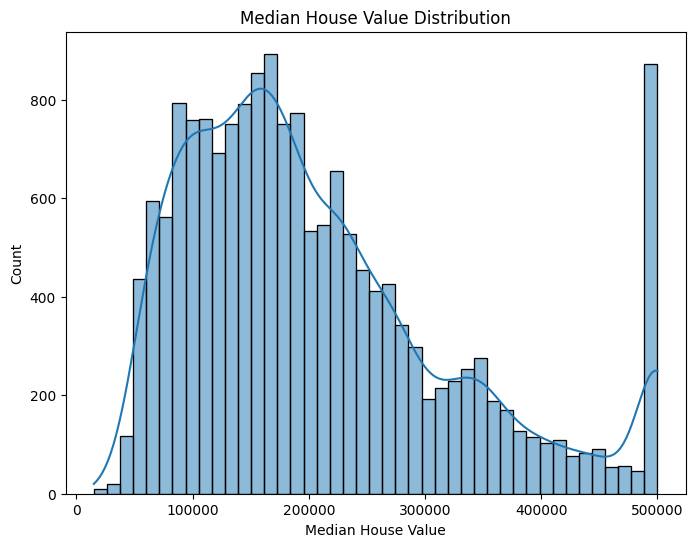

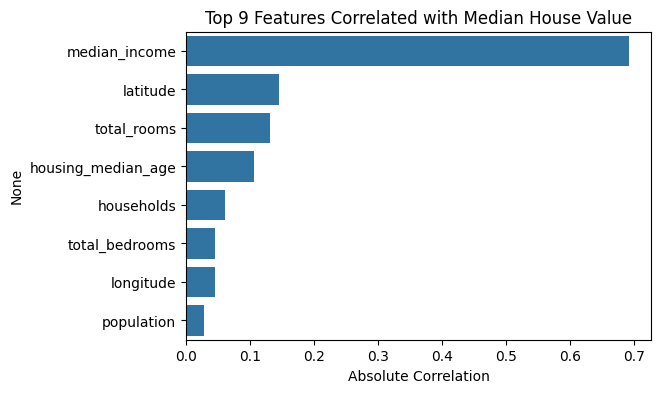

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 Summary statistics
display(train_df.describe())

# 2.2 Missing-value report
missing = train_df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

# 2.3 Target distribution
plt.figure(figsize=(8,6))
sns.histplot(train_df['median_house_value'], kde=True)
plt.title('Median House Value Distribution')
plt.xlabel('Median House Value')
plt.show()

# 2.4 Top correlations with the target
corr = train_df.corr()['median_house_value'].abs().sort_values(ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x=corr.values[1:], y=corr.index[1:])   # skip self-correlation
plt.title('Top 9 Features Correlated with Median House Value')
plt.xlabel('Absolute Correlation')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# no categoricals here—all numeric—so we only need to handle any missings:
train_df = train_df.dropna()  # this dataset has few or no missings by default

X = train_df.drop('median_house_value', axis=1)
y = train_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test  shapes:", X_test.shape,  y_test.shape)

Train shapes: (13600, 8) (13600,)
Test  shapes: (3400, 8) (3400,)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# — Model 1: Linear Regression —
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr   = r2_score(y_test, y_pred_lr)
print(f"Linear Regression → RMSE: {rmse_lr:.2f}, R²: {r2_lr:.3f}")

# — Model 2: Random Forest —
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf   = r2_score(y_test, y_pred_rf)
print(f"Random Forest        → RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

Linear Regression → RMSE: 68078.33, R²: 0.664
Random Forest        → RMSE: 49414.55, R²: 0.823


,Model,RMSE,R2
0,Linear Regression,68078.325525,0.663640
1,Random Forest,49414.545905,0.822787


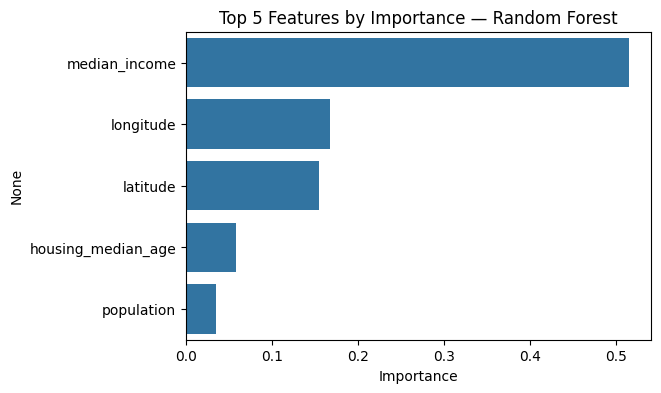

In [10]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest'],
    'RMSE':  [rmse_lr, rmse_rf],
    'R2':    [r2_lr,   r2_rf]
})
display(results)

# Feature importances (RF)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top5 = importances.sort_values(ascending=False).head(5)

plt.figure(figsize=(6,4))
sns.barplot(x=top5, y=top5.index)
plt.title('Top 5 Features by Importance — Random Forest')
plt.xlabel('Importance')
plt.show()